In [2]:
import networkx as nx
from networkx.algorithms import bipartite

In [3]:
B = nx.Graph()

In [4]:
B.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite = 0)  # --> etiqueta de un lado de los nodos

In [5]:
B.add_nodes_from([1,2,3,4], bipartite = 1) # --> etiqueta del otro lado de los nodos

In [6]:
B.add_edges_from([('A',1), ('B',1), ('C',1), ('C',3), ('D',2), ('E',3), ('E', 4)]) # --> agregamos los enlaces entre los nodos

In [12]:
bipartite.is_bipartite(B)

True

https://networkx.org/documentation/stable/reference/algorithms/bipartite.html#module-networkx.algorithms.bipartite

In [ ]:
bipartite.sets(B)

In [20]:
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
top_nodes

{'A', 'B', 'C', 'D', 'E'}

In [17]:
bottom_nodes = set(B) - top_nodes

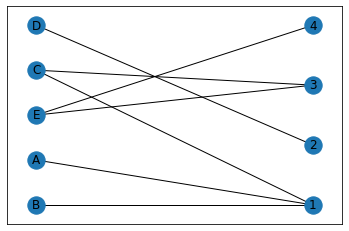

In [18]:
# graficar
pos = nx.bipartite_layout(B, top_nodes)
nx.draw_networkx(B, pos)

Proyección bipartita para los fans:



In [21]:
P_f = bipartite.projected_graph(B, top_nodes)

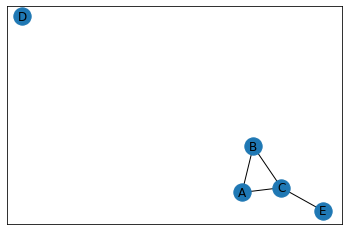

In [22]:
nx.draw_networkx(P_f)

Proyección bipartita para los equipos:

In [23]:
P_t = bipartite.projected_graph(B, bottom_nodes)

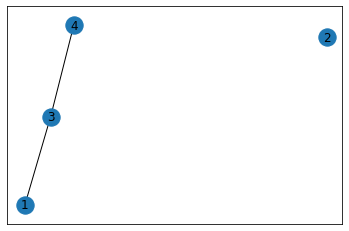

In [24]:
nx.draw_networkx(P_t)

Proyección bipartita con pesos para los equipos:

{(1, 3): Text(-0.40105297935327655, 0.06644668395437026, '1'),
 (3, 4): Text(-0.26044301527960295, 0.2402215682262373, '1')}

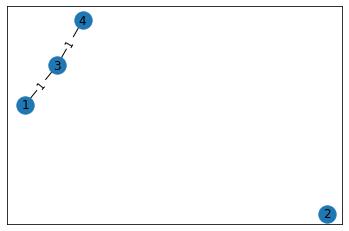

In [28]:
P_w = bipartite.weighted_projected_graph(B, bottom_nodes)
pos = nx.spring_layout(P_w)
nx.draw_networkx(P_w, pos)
labels = nx.get_edge_attributes(P_w,'weight')
nx.draw_networkx_edge_labels(P_w,pos,edge_labels=labels)